In [1]:
import numpy as np
from tqdm import tqdm
import sqlite3

In [2]:
#clean_data = np.load('arrays_lc.npz', allow_pickle=True)
noise = np.load('arrays_noise.npz', allow_pickle=True)

In [3]:
# Create or connect to an SQLite database
conn = sqlite3.connect('noise.db')
c = conn.cursor()

# Create a table
c.execute('''CREATE TABLE IF NOT EXISTS noises
             (id INTEGER PRIMARY KEY, data BLOB)''')
conn.commit()

In [4]:
for i, key in enumerate(noise.files):
    array = noise[key]
    # Ensure the array is in float32 format; adjust as necessary
    array = array.astype(np.float32)
    # Serialize the array
    data = array.tobytes()
    # Insert the serialized array into the database
    c.execute('INSERT INTO noises (data) VALUES (?)', (data,))
    if i % 100 == 0:
        conn.commit()  # Commit periodically

# Final commit and close the connection
conn.commit()
conn.close()

In [7]:
def load_array(array_id):
    # Connect to the SQLite database
    #conn = sqlite3.connect('lightcones.db')
    conn = sqlite3.connect('noise.db')
    c = conn.cursor()
    
    # Fetch the array data by ID
    c.execute('SELECT data FROM noises WHERE id=?', (array_id,))
    data = c.fetchone()[0]
    
    # Deserialize the array data
    array = np.frombuffer(data, dtype=np.float32).reshape((64, 64, 86))
    
    conn.close()
    return array

# Example: Load the array with ID 1
loaded_array = load_array(10001)
print(loaded_array.shape)

(64, 64, 86)


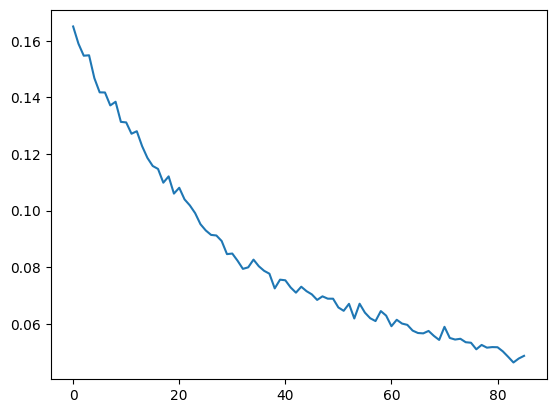

In [8]:
import matplotlib.pyplot as plt
rms = []
for i in range(86):
    rms.append(np.sqrt(np.mean(loaded_array[:,:,i]**2)))
plt.plot(rms)